In [95]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [96]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [97]:
##SCALING THE DATA
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [98]:
y_train[0]

4

In [99]:
class_names=["tshirt/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle-boot"]

In [100]:
##CREATING THE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_38 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.layers[1].name

'dense_37'

In [111]:
weights,biases=model.get_layer("dense_39").get_weights()

In [112]:
len(weights),len(biases)

(100, 10)

In [113]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [114]:
weights.shape

(100, 10)

In [115]:
##Compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])


##NOTE..we can use class_weight during model.fit to give more weightage to an under-represented class
##we can also use sample_weight to assign that weight to samples instead of the whole class
##the params accept a dict..with form as {label1:weight1,label2:weight2}
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0235 - accuracy: 0.6711 - val_loss: 0.5115 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5133 - accuracy: 0.8202 - val_loss: 0.4424 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4549 - accuracy: 0.8410 - val_loss: 0.4419 - val_accuracy: 0.8458
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4260 - accuracy: 0.8493 - val_loss: 0.3993 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4001 - accuracy: 0.8593 - val_loss: 0.3904 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3797 - accuracy: 0.8668 - val_loss: 0.3691 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3664 - accuracy: 0.8694 - val_loss: 0.3948 - val_accuracy:

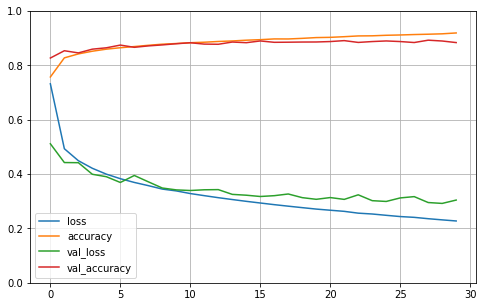

In [116]:
import matplotlib.pyplot as plt

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [117]:
##CHECKING ON TEST DATA

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 55.2255 - accuracy: 0.8576


[55.225494384765625, 0.8575999736785889]

In [118]:
##Making predictions
X_new=X_test[:3]
y_pred=np.argmax(model.predict(X_new),axis=-1)
y_pred

array([9, 2, 1])

In [120]:
##Regression using Functional API

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split


housing=fetch_california_housing()

X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)
X_test_scaled=scaler.transform(X_test)

In [125]:
housing.target[0]

4.526

In [126]:
model=Sequential([
                  Dense(30,activation="relu",input_shape=X_train.shape[1:]),
                  Dense(1)
])
model.compile(loss="mse",optimizer="sgd")
history=model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid_scaled,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2267 - val_loss: 0.7311
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 6.9191 - val_loss: 3.8784
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 22.6075 - val_loss: 0.6444
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6530 - val_loss: 0.5021
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4976 - val_loss: 0.4396
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4534 - val_loss: 0.4168
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4420 - val_loss: 0.4125
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4382 - val_loss: 0.3909
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4170 - val_loss: 0.3920
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3942 - val_loss: 0.388

In [59]:
X_train.shape[1:]

(8,)

In [127]:
from tensorflow.keras.layers import Input,Dense,Concatenate
from tensorflow.keras.models import Model
##basically a resnet

input=Input(shape=X_train.shape[1:])
hidden1=Dense(30,activation="relu")(input)
hidden2=Dense(30,activation="relu")(hidden1)
concat=Concatenate()([input,hidden2])
output=Dense(1)(concat)
model=Model(inputs=[input],outputs=[output])

In [128]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_44 (Dense)                (None, 30)           270         input_19[0][0]                   
__________________________________________________________________________________________________
dense_45 (Dense)                (None, 30)           930         dense_44[0][0]                   
__________________________________________________________________________________________________
concatenate_10 (Concatenate)    (None, 38)           0           input_19[0][0]                   
                                                                 dense_45[0][0]             

In [129]:
##REST IS SAME AS USUAL...COMPILE >>>FIT>>PREDICT>>

##Now in the above scenario the model can learn both deep features(cuz it passes through all them layers) and shallow features(initial ip relations..cuz @the concat stuff)

##Now what if we want to learn deep features from a part of our input and deep features from the other part(NOTE:The parts don't have to be mutually exclusive)


In [135]:
input_A=Input(shape=(5,))##(0 to 4)
input_B=Input(shape=(6,))##(2 to 7)
hidden_1=Dense(30,activation="relu")(input_B)
hidden_2=Dense(30,activation="relu")(hidden_1)
concat_=Concatenate()([hidden_2,input_A])
output_=Dense(1)(concat_)
model_1=Model(outputs=[output_],inputs=[input_A,input_B])

In [136]:
model_1.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_47 (Dense)                (None, 30)           210         input_21[0][0]                   
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 30)           930         dense_47[0][0]                   
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 5)]          0                                            
____________________________________________________________________________________________

In [137]:
##Now since we messed with the input we gotta make some changes
X_train_A,X_train_B=X_train_scaled[:,:5],X_train_scaled[:,2:]
X_valid_A,X_valid_B=X_valid_scaled[:,:5],X_valid_scaled[:,2:]
X_test_A,X_test_B=X_test_scaled[:,:5],X_test_scaled[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]

In [138]:
model_1.compile(loss="mse",optimizer="sgd")
hs=model_1.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4409 - val_loss: 0.4778
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4991 - val_loss: 0.4531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4886 - val_loss: 0.4371
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4692 - val_loss: 0.4302
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4561 - val_loss: 0.9721
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5666 - val_loss: 0.4112
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4356 - val_loss: 0.4038
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4248 - val_loss: 0.3993
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4110 - val_loss: 0.3951
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4320 - val_loss: 0.3912

In [139]:
##WHAT IF WE WANT MULTIPLE INPUTS AND MULTIPLE OUTPUTS

inputA=Input(shape=(5,))
inputB=Input(shape=(6,))
hiddenOne=Dense(30,activation="relu")(inputB)
hiddenTwo=Dense(30,activation="relu")(hiddenOne)
auxOp=Dense(1)(hiddenTwo)
concatLayer=Concatenate()([hiddenTwo,inputA])
op=Dense(1)(concatLayer)
model_multi_op=Model(inputs=[inputA,inputB],outputs=[op,auxOp])

In [140]:
model_multi_op.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_50 (Dense)                (None, 30)           210         input_23[0][0]                   
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 30)           930         dense_50[0][0]                   
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, 5)]          0                                            
___________________________________________________________________________________________

In [141]:
##NOTE...each output will now need it's own loss function.By default keras will compute the individual losses of the ops but we can use loss_weights to 
##have more control over how important a particular loss is

model_multi_op.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")

hiStory=model_multi_op.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9359 - dense_53_loss: 1.7351 - dense_52_loss: 3.7428 - val_loss: 0.6058 - val_dense_53_loss: 0.5377 - val_dense_52_loss: 1.2189
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6241 - dense_53_loss: 0.5552 - dense_52_loss: 1.2438 - val_loss: 0.5406 - val_dense_53_loss: 0.4830 - val_dense_52_loss: 1.0587
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5514 - dense_53_loss: 0.4934 - dense_52_loss: 1.0739 - val_loss: 0.4994 - val_dense_53_loss: 0.4526 - val_dense_52_loss: 0.9208
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5245 - dense_53_loss: 0.4769 - dense_52_loss: 0.9533 - val_loss: 0.4755 - val_dense_53_loss: 0.4386 - val_dense_52_loss: 0.8073
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4891 - dense_53_loss: 0.4519 - dense_52_loss: 0.8241 - val_loss: 0.4587 - val_dense_53_loss: 0.4282 - val_de

In [142]:
X_train_A[0]

array([ 2.37324825, -1.01023973,  0.87517763, -0.2226037 ,  0.39147811])

In [143]:
y_pred_main,y_pred_aux=model_multi_op.predict([X_new_A,X_new_B])

In [146]:
y_pred_main

array([[2.2549722],
       [3.055324 ],
       [1.4203308]], dtype=float32)

In [148]:
y_test[:3]

array([2.651, 4.319, 1.393])

In [149]:
##Both the sequential and functional api create models in a static manner
##For Dynamic models we can use SubClassing Api

class WideAndDeepModel(Model):
  def __init__(self,units=30,activation="relu",**kwargs):
    super().__init__(**kwargs)
    self.hidden1=Dense(units,activation=activation)
    self.hidden2=Dense(units,activation=activation)
    self.main_output=Dense(1)
    self.aux_output=Dense(1)

  def call(self,inputs):
    ##YOU CAN GO CRAZY HERE
    input_A,input_B=inputs
    hidden1=self.hidden1(input_B)
    hidden2=self.hidden2(hidden1)
    concat=concatenate()([input_A,hidden2])
    main_output=self.main_output(concat)
    aux_output=self.aux_output(hidden2)
    return main_output,aux_output  

##CONS:model architecture wont be visible
##wont be shown which layer is conected to which

In [150]:
##SAving the model
model_multi_op.save("helloWorld.h5")

In [151]:
##LOADING
hW=keras.models.load_model("helloWorld.h5")

In [153]:
hW.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_50 (Dense)                (None, 30)           210         input_23[0][0]                   
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 30)           930         dense_50[0][0]                   
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, 5)]          0                                            
___________________________________________________________________________________________

In [155]:
##Callbacks--->pings @ b4 and end of training
##------------------->b4 and end of epoch
##-------------------->b4 after processing each batch

##ModelCheckpoint callback->saves checkpoints of your Model at regular intervals during training at the end of each epoch

checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(
    "my_keras_model.h5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

##EARLY STOPPING CALLBACK
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])


##CUSTOM CALLBACK

class printValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    print(logs["val_loss"]/logs["loss"])

In [158]:
##VISUALIZING USING TENSORBOARD
#history=model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid_scaled,y_valid))

import os

root_logdir=os.path.join(os.curdir,"my_logs")

def get_run_logdir():
  import time
  run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir,run_id)

run_logdir=get_run_logdir()
##NOTE---Keras provides a tensorboard callback


tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir)
model.compile(loss="mse",optimizer="sgd")
history=model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid_scaled,y_valid),callbacks=[tensorboard_cb])


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4768 - val_loss: 0.5761
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] 

In [159]:
##HyperParameter Tuning

def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=(8,)):
  model=Sequential()
  options={"input_shape":input_shape}
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options={}
  model.add(Dense(1,**options))
  model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate))
  return model


##We will wrap the model returned by build_model so that we can use the goodies used by scikit learn

keras_reg=tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)


keras_reg.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_valid_scaled,y_valid),callbacks=[tf.keras.callbacks.EarlyStopping(
    patience=10
)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.1206 - val_loss: 0.6297
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7613 - val_loss: 0.5673
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6191 - val_loss: 0.5215
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5623 - val_loss: 0.5000
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5214 - val_loss: 0.4836
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5052 - val_loss: 0.4746
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4900 - val_loss: 0.4657
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4663 - val_loss: 0.4612
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4958 - val_loss: 0.4555
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4810 - val_lo

In [160]:
mse_test=keras_reg.score(X_test_scaled,y_test)

162/162 [==============================] - 0s 922us/step - loss: 0.3817


In [ ]:
##WE DO NOT WANT TO TRAIN A SINGLE MODEL..we wanna train variants...and find the best of the all
##ENTER...Randomized SearchCV

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params_distribs={
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-4,3e-2)
}

rnd_search_cv=RandomizedSearchCV(keras_reg,params_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_valid_scaled,y_valid))

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
best_model=rnd_search_cv.best_estimator_.model